In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [24]:
data = pd.read_csv('..\sensex_transformed_data.csv', index_col=0)
data = data.drop(columns=['Target'])
data

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,37000,3792.610107,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419
1,26000,3815.310059,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714
2,19800,3832.500000,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109
3,26000,3765.820068,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537
4,29000,3741.659912,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981
...,...,...,...,...,...,...,...,...,...,...
5252,9000,78041.593750,80149.161312,80330.702386,80399.112120,80032.832132,77871.533848,71343.134104,-288.144752,34.749803
5253,10300,78540.171875,79827.363424,80160.175671,80326.212502,80003.274503,77878.186963,71371.864794,-340.014924,38.828621
5254,6200,78472.867188,79556.464177,79999.479625,80253.532294,79972.969407,77884.104179,71400.212109,-360.537972,38.478940
5255,5600,78472.476562,79339.666654,79854.050762,80183.686971,79943.256678,77889.958630,71428.444701,-355.245360,38.476774


In [26]:
features = data.drop(columns=['Close'])
close_prices = data['Close']
features

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,37000,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419
1,26000,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714
2,19800,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109
3,26000,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537
4,29000,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981
...,...,...,...,...,...,...,...,...,...
5252,9000,80149.161312,80330.702386,80399.112120,80032.832132,77871.533848,71343.134104,-288.144752,34.749803
5253,10300,79827.363424,80160.175671,80326.212502,80003.274503,77878.186963,71371.864794,-340.014924,38.828621
5254,6200,79556.464177,79999.479625,80253.532294,79972.969407,77884.104179,71400.212109,-360.537972,38.478940
5255,5600,79339.666654,79854.050762,80183.686971,79943.256678,77889.958630,71428.444701,-355.245360,38.476774


In [27]:
close_price_next = close_prices.shift(-1)
close_price_next = close_price_next.dropna()
close_price_next

0        3815.310059
1        3832.500000
2        3765.820068
3        3741.659912
4        3806.830078
            ...     
5251    78041.593750
5252    78540.171875
5253    78472.867188
5254    78472.476562
5255    78699.070312
Name: Close, Length: 5256, dtype: float64

In [28]:
features_adjusted = features.iloc[:-1, :]
features_adjusted

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,37000,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419
1,26000,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714
2,19800,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109
3,26000,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537
4,29000,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981
...,...,...,...,...,...,...,...,...,...
5251,6500,80676.053202,80571.661190,80495.337359,80073.059170,77869.824703,71316.286570,-134.219160,40.695281
5252,9000,80149.161312,80330.702386,80399.112120,80032.832132,77871.533848,71343.134104,-288.144752,34.749803
5253,10300,79827.363424,80160.175671,80326.212502,80003.274503,77878.186963,71371.864794,-340.014924,38.828621
5254,6200,79556.464177,79999.479625,80253.532294,79972.969407,77884.104179,71400.212109,-360.537972,38.478940


In [29]:
close_prices_adjusted = close_prices.iloc[:-1]
target = ((close_price_next - close_prices_adjusted) / close_prices_adjusted)*100
target

0       0.598531
1       0.450552
2      -1.739855
3      -0.641564
4       1.741745
          ...   
5251   -1.485082
5252    0.638862
5253   -0.085695
5254   -0.000498
5255    0.288756
Name: Close, Length: 5256, dtype: float64

In [30]:
df_adjusted = pd.DataFrame(features_adjusted, columns=features.columns)
df_adjusted['Target'] = target.values
df_adjusted

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,Target
0,37000,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419,0.598531
1,26000,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714,0.450552
2,19800,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109,-1.739855
3,26000,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537,-0.641564
4,29000,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981,1.741745
...,...,...,...,...,...,...,...,...,...,...
5251,6500,80676.053202,80571.661190,80495.337359,80073.059170,77869.824703,71316.286570,-134.219160,40.695281,-1.485082
5252,9000,80149.161312,80330.702386,80399.112120,80032.832132,77871.533848,71343.134104,-288.144752,34.749803,0.638862
5253,10300,79827.363424,80160.175671,80326.212502,80003.274503,77878.186963,71371.864794,-340.014924,38.828621,-0.085695
5254,6200,79556.464177,79999.479625,80253.532294,79972.969407,77884.104179,71400.212109,-360.537972,38.478940,-0.000498


In [31]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(features_adjusted, target, test_size=0.2)

In [32]:
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
X_train_scaled = Xscaler.fit_transform(X_train)
X_test_scaled = Xscaler.transform(X_test)

In [33]:
test = pd.DataFrame(X_train, columns=features.columns)
test['y_train'] = y_train.values
test.sort_index()

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,y_train
0,37000,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419,0.598531
1,26000,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714,0.450552
2,19800,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109,-1.739855
3,26000,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537,-0.641564
4,29000,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981,1.741745
...,...,...,...,...,...,...,...,...,...,...
5248,5200,81397.815092,80779.160765,80557.398032,80076.436227,77804.239727,71211.136887,212.646696,59.591110,-1.301695
5249,4900,81255.142699,80770.140990,80562.380585,80088.476166,77832.898567,71248.954517,105.871048,50.439395,-0.622487
5253,10300,79827.363424,80160.175671,80326.212502,80003.274503,77878.186963,71371.864794,-340.014924,38.828621,-0.085695
5254,6200,79556.464177,79999.479625,80253.532294,79972.969407,77884.104179,71400.212109,-360.537972,38.478940,-0.000498


In [34]:
X_test_scaled

array([[-0.06897635, -0.12657465, -0.12015603, ...,  0.03816475,
         0.40610629, -0.05167654],
       [-0.06587197, -0.44309346, -0.44809488, ..., -0.55716532,
        -0.82656952, -0.2917552 ],
       [-0.06778938,  0.33639598,  0.33515913, ...,  0.33941548,
         0.17601933,  0.34527623],
       ...,
       [-0.06541544, -0.10532116, -0.12167982, ..., -0.01342099,
         0.70287624,  1.26456108],
       [-0.06011973, -0.10951401, -0.10981413, ..., -0.0095165 ,
        -0.57220445, -0.4906942 ],
       [ 0.0038853 , -1.1642285 , -1.16630552, ..., -1.22237026,
         0.30978875,  0.54103467]], shape=(1052, 9))

In [35]:
model_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model_regressor.fit(X_train_scaled, y_train)
predictions = model_regressor.predict(X_test_scaled)
model_regressor.score(X_test_scaled, y_test)

-0.09596671825055036

In [36]:
y_test

3298   -0.116470
1782   -0.555371
3655    0.112282
577     1.248507
718     2.347978
          ...   
3333    0.348933
2732    0.861328
3159   -0.951861
3172    0.460516
376     1.376866
Name: Close, Length: 1052, dtype: float64

In [37]:
y_test_series = pd.Series(y_test, index=X_test.index)
pred_series   = pd.Series(predictions, index=X_test.index)
df2 = pd.DataFrame(pred_series, columns=['y_predicted'])
df2['y_test'] = y_test_series
df2.sort_index()

,y_predicted,y_test
8,0.107264,0.942563
12,0.580171,1.240112
17,0.531038,1.282907
23,0.506758,1.234630
26,0.425344,-0.204089
...,...,...
5244,-0.062597,0.019744
5247,-0.287998,-0.468200
5250,-0.265059,-1.202457
5251,-0.043664,-1.485082


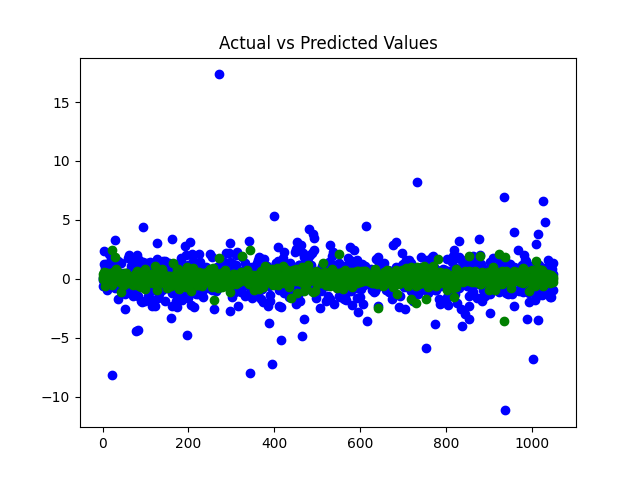

In [39]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.clf()
plt.scatter(range(len(y_test)), y_test, color='Blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='Green', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.show()